In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)

In [2]:
data = pd.read_excel("P6-SuperStoreUS-2015.xlsx")
df = data.copy()

In [31]:
def dataframe_kontrol(dataframe:pd.DataFrame):
    print(" - Satır Bilgisi - ".center(50,"*"))
    print(dataframe.index)
    print(" - Sutun Bilgisi - ".center(50,"*"))
    print(dataframe.columns)
    print(" - Tip Bilgisi - ".center(50, "*"))
    print(dataframe.dtypes)
    print(" - Satır ve Sutun Sayısı - ".center(50, "*"))
    print(dataframe.shape)
    print(" - Toplam Eleman Sayısı - ".center(50, "*"))
    print(dataframe.size)
    print(" - Toplam Boyut - ".center(50, "*"))
    print(dataframe.ndim)
    print(" - Metadata - ".center(50, "*"))
    print(dataframe.info())
    print(" - Boş Gözleme Ait Değişkenler - ".center(50, "*"))
    print(dataframe.isnull().sum())

Veri seti 1952 gözlem ve 25 değişken vardır.Bu değişkenlerin 12'si kategorik değişkendir. Ram de yaklaşık 380 kb alan kaplar. Product base margin değişkeni 16 boş gözlem içerir.

In [32]:
dataframe_kontrol(df)

*************** - Satır Bilgisi - ****************
RangeIndex(start=0, stop=1952, step=1)
*************** - Sutun Bilgisi - ****************
Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Country', 'Region',
       'State or Province', 'City', 'Postal Code', 'Order Date', 'Ship Date',
       'Profit', 'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')
**************** - Tip Bilgisi - *****************
Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Produ

In [3]:
df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1936.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.515186,51534.769467,114.793859,12.944672,985.828832,82365.924180
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.137055,29362.828420,1141.112387,13.871565,2559.900167,19042.295798
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.525000,48765.500000,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,9228.225600,167.000000,45737.330000,91586.000000


In [4]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,United States,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,0.60,United States,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,United States,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,United States,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,United States,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


Kategorik ve numerik değişkenler ayrı olarak gruplandırıldı.

In [6]:
kategorik = df.select_dtypes(include=["object"])

In [7]:
surekli = df.select_dtypes(include = ["float64","int64"])

In [8]:
kategorik.head()

,Order Priority,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Country,Region,State or Province,City
0,High,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,United States,West,Washington,Anacortes
1,Not Specified,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,United States,West,California,San Gabriel
2,Critical,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",United States,East,New Jersey,Roselle
3,Medium,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,United States,Central,Minnesota,Prior Lake
4,Medium,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,United States,Central,Minnesota,Prior Lake


In [9]:
surekli.head()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
0,20847,0.01,2.84,0.93,3,0.54,98221,4.5600,4,13.01,88522
1,20228,0.02,500.98,26.00,5,0.60,91776,4390.3665,12,6362.85,90193
2,21776,0.06,9.48,7.29,11,0.45,7203,-53.8096,22,211.15,90192
3,24844,0.09,78.69,19.99,14,0.43,55372,803.4705,16,1164.45,86838
4,24846,0.08,3.28,2.31,14,0.56,55372,-24.0300,7,22.23,86838


Sipariş önceliği her seviye için ortalama bir sağılıma sahip

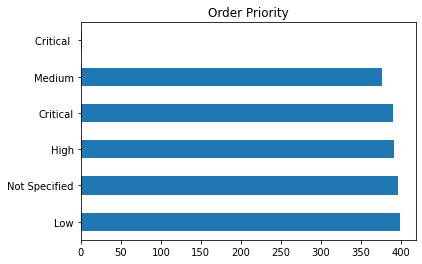

In [10]:
{kategorik["Order Priority"]
 .value_counts()
 .plot.barh()
 .set_title("Order Priority")};

Teslimatların yüksek çoğunluğu düzenli hava yolu teslimatı ile iletiliyor.

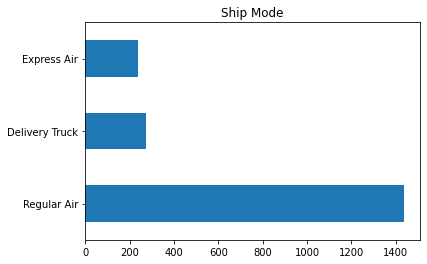

In [11]:
{kategorik["Ship Mode"]
 .value_counts()
 .plot.barh()
 .set_title("Ship Mode")};

Bir çok alandan müşteri segmenti var lakin kurumsal firmalar ile daha çok iş yapılıyor.

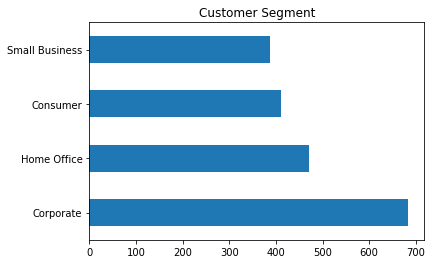

In [12]:
{kategorik["Customer Segment"]
 .value_counts()
 .plot.barh()
 .set_title("Customer Segment")};

3 kategoride ürün tedariği yapılmakta, ofis malzemeleri çoğunluğu oluşturuyor.

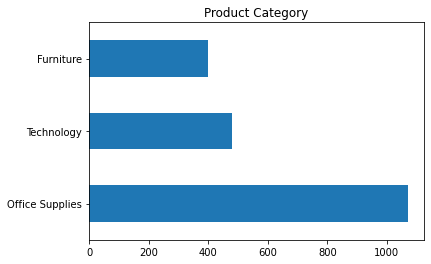

In [13]:
{kategorik["Product Category"]
 .value_counts()
 .plot.barh()
 .set_title("Product Category")};

Ofis malzemeleri alt başlığı çok çeşitli lakin teknoloji kategorisini telefon ve iletişim ürünü sırtlıyor.

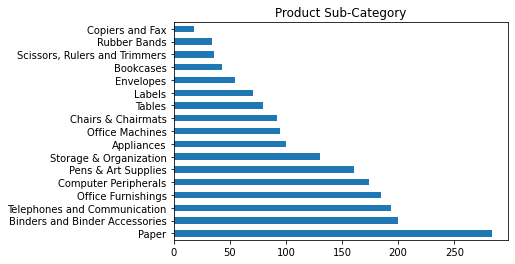

In [14]:
{kategorik["Product Sub-Category"]
 .value_counts()
 .plot.barh()
 .set_title("Product Sub-Category")};

Ürünler genellikle küçük kutular ile teslim ediliyor. Bu da sık ve az miktarda satışın fazla olduğunu gösteriyor.

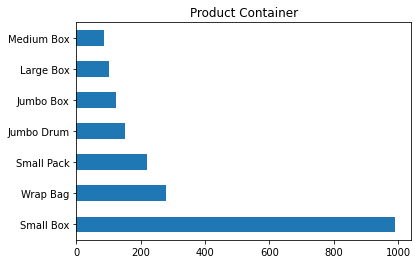

In [15]:
{kategorik["Product Container"]
 .value_counts()
 .plot.barh()
 .set_title("Product Container")};

Sadece ABD de yer alan yerel bir şirket

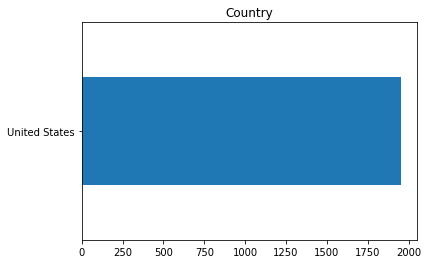

In [16]:
{kategorik["Country"]
 .value_counts()
 .plot.barh()
 .set_title("Country")};

Bölgelerde eşit dağılım göstermesi ülke geneline yayıldığını gösteriyor.

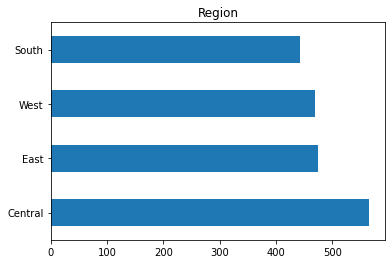

In [17]:
{kategorik["Region"]
 .value_counts()
 .plot.barh()
 .set_title("Region")};

Kamyon ile yapılan gönderimlerin diğer iki yönteme göre daha maliyetli olduğu görülüyor.

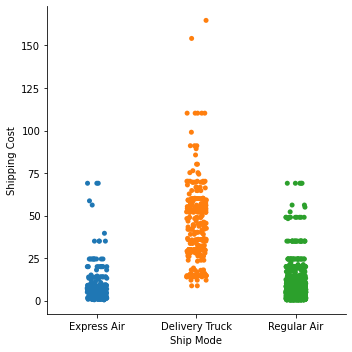

In [18]:
sns.catplot(x="Ship Mode", y="Shipping Cost", data=df);

Ekstra büyük kutu teslimatı kamyonlar ile daha küçük boyutlar ise uçak ile yapılmaktadır. Bu durum yakıttan tasarruf ama teslimat ücreti kısmıda artış olarak yorumlanabilir.

In [19]:
df.groupby(["Product Container","Ship Mode"])["Shipping Cost"].mean()

Product Container  Ship Mode     
Jumbo Box          Delivery Truck    50.092661
Jumbo Drum         Delivery Truck    39.247086
                   Regular Air        0.750000
Large Box          Express Air       33.053684
                   Regular Air       29.608519
Medium Box         Express Air       20.150769
                   Regular Air       11.642027
Small Box          Express Air        7.660305
                   Regular Air        7.410953
Small Pack         Express Air        4.801500
                   Regular Air        4.702961
Wrap Bag           Express Air        2.862703
                   Regular Air        2.102355
Name: Shipping Cost, dtype: float64

<AxesSubplot:xlabel='Shipping Cost'>

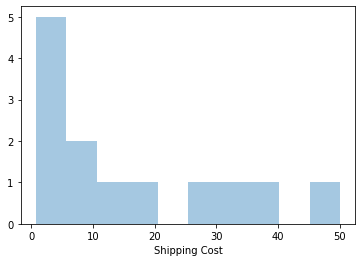

In [20]:
a = df.groupby(["Product Container","Ship Mode"])["Shipping Cost"].mean()
sns.distplot(a, bins=10, kde=False)

<AxesSubplot:xlabel='Shipping Cost'>

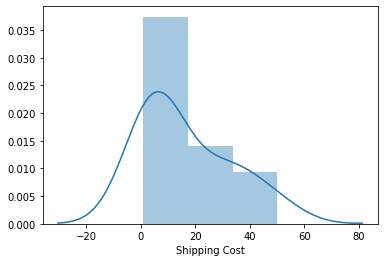

In [21]:
sns.distplot(a)

Ürünlerin kilogramlarına göre teslimat dağılımları küçük yükler daha çok uçaklar ile taşınırken her seviyede yük kamyonlar ile taşınabilmektedir.

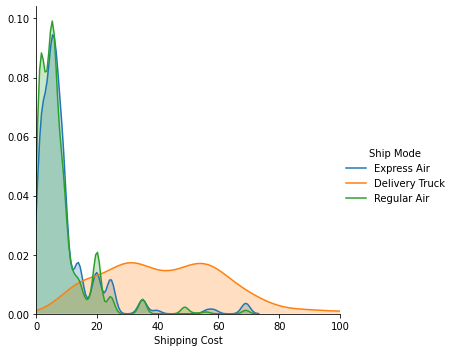

In [22]:
{sns
.FacetGrid(df,
          hue = "Ship Mode",
          height = 5,
          xlim = (0,100))
.map(sns.kdeplot, "Shipping Cost",shade=True)
.add_legend()};

Ofis malzemeleri genellikle kamyonlar ile taşınırken teknoloji ürünleri yakın bir dağıtım kategorisine sahiptir. Mobilyalar ise hızlı hava yolu ile artarılma oranı yüksektir.

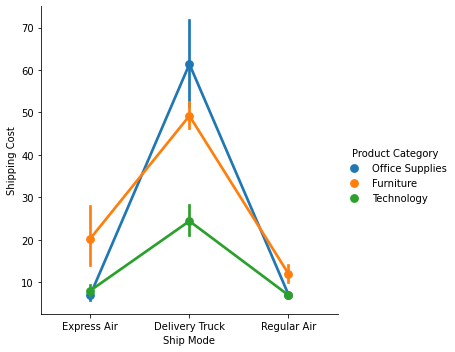

In [23]:
sns.catplot(x="Ship Mode", y="Shipping Cost",hue="Product Category",kind="point", data=df);

Ofis malzemelerinin birim fiyatı mazemeye göre yüksek değişkenlik gössterirken mobilya ve teknoloji yakın seviyelerde birim fiyata sahiptirler.

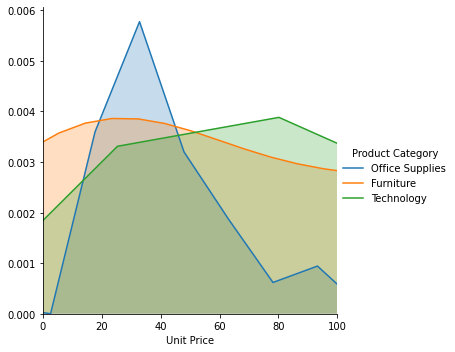

In [24]:
{sns
.FacetGrid(df,
          hue = "Product Category",
          height = 5,
          xlim = (0,100))
.map(sns.kdeplot, "Unit Price",shade=True)
.add_legend()};

En çok kar kalem ve sanat malzemelerinden elde edilirken bilgisayar donanımlarından zarar edilmiştir.

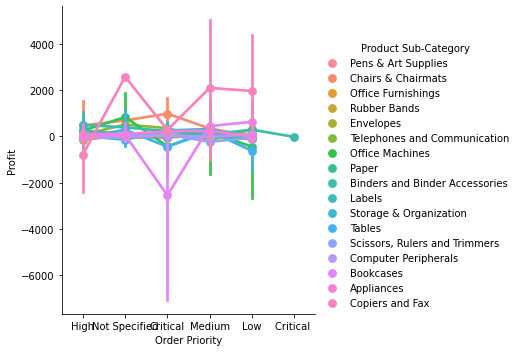

In [25]:
sns.catplot(x="Order Priority", y="Profit",hue="Product Sub-Category",kind="point", data=df);

Satış yapılan kategorilere baktığımızda mobilya ve teknoloji kategorileri ofis malzemelerine göre daha çok satılmaktadır.

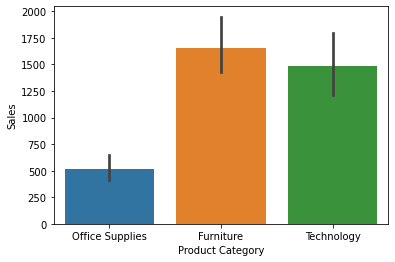

In [55]:
sns.barplot(x="Product Category", y="Sales", data=df);

Aşağıdaki scatter grafikten de görüleceği gibi gönderim ücreti arttıkça indirim düşmektedir. Bu durum da uzak ve yakın mesafeye giden aynı ürünün birim fiyatlarının değişkenlik ifade ettiğini gösterir.

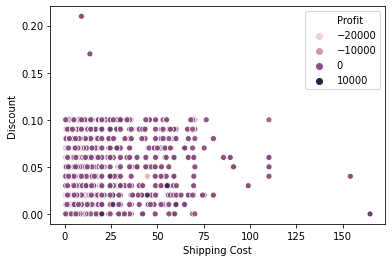

In [56]:
sns.scatterplot(x = "Shipping Cost", y="Discount", hue="Profit", data=df);

Batıdan gelen ürünler birim fiyatı yüksek iken zarar birim fiyatı düşük iken yüksek kar sağlamaktadır.  Güneyden gelen ürünler ise sabit birim fiyatının olması aynı ürünlerin fazla miktarda aktarıldığını gösterir.

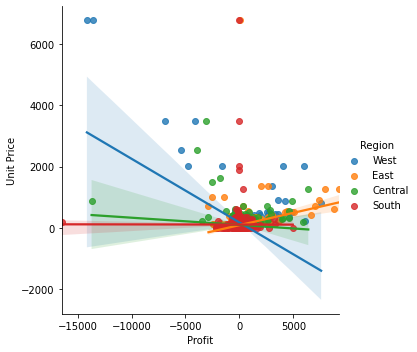

In [63]:
sns.lmplot(x="Profit", y= "Unit Price", hue="Region",data=df);